In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


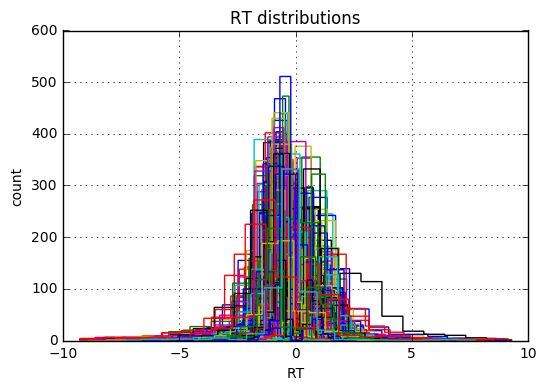

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (angry) and facial expression (angry)
aa1_data = data1.loc[(data1['emotionRating'] == 'angry') & (data1['expression'] == 'angry')]
aa1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
15,gc2le9xecjp1stz,0,3,angry,17,_faces/27_F_A_L.jpg,27_F_A_L,27,F,angry,lower,1,1.293860,50,0,0,0,0,0
17,gc2le9xecjp1stz,0,3,angry,19,_faces/15_M_A_U.jpg,15_M_A_U,15,M,angry,upper,1,2.019210,50,0,0,0,0,0
29,gc2le9xecjp1stz,0,3,angry,31,_faces/58_F_A_X.jpg,58_F_A_X,58,F,angry,baseline,1,1.656685,100,0,0,0,0,0
32,gc2le9xecjp1stz,0,3,angry,34,_faces/15_M_A_L.jpg,15_M_A_L,15,M,angry,lower,1,1.007755,50,0,0,0,0,0
35,gc2le9xecjp1stz,0,3,angry,37,_faces/27_F_A_X.jpg,27_F_A_X,27,F,angry,baseline,1,0.997660,100,0,0,0,0,0
38,gc2le9xecjp1stz,0,3,angry,40,_faces/49_M_A_L.jpg,49_M_A_L,49,M,angry,lower,0,-0.940125,50,0,0,0,0,0
41,gc2le9xecjp1stz,0,3,angry,43,_faces/30_M_A_X.jpg,30_M_A_X,30,M,angry,baseline,1,0.927440,100,0,0,0,0,0
43,gc2le9xecjp1stz,0,3,angry,45,_faces/12_F_A_U.jpg,12_F_A_U,12,F,angry,upper,1,1.621310,50,0,0,0,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
aa1_data = aa1_data[(aa1_data.subj_idx != 'f89wrv54kh9lqrw')]

In [6]:
# define model
m_aa1 = hddm.HDDMRegressor(aa1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 31406.0 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                         mean         std        2.5q         25q          50q        75q      97.5q       mc err
a                                      1.6432   0.0372142     1.57252     1.61775      1.64251    1.66857    1.71785   0.00066021
a_std                                0.506436   0.0312011    0.448145    0.484336     0.505121   0.527455   0.569808  0.000649631
a_subj.02hcv424u29nd5w                2.24843    0.313884     1.72894     2.02571      2.21875    2.43818    2.93481   0.00610634
a_subj.02k2uwlhgxnumn9                1.27137    0.166251    0.996876     1.15397      1.25388     1.3709    1.64763   0.00291594
a_subj.03g7h2hzq4o3g26                2.92352    0.293064       2.408     2.71606      2.89905    3.10811    3.55514   0.00363909
a_subj.0nmr75cysk1ae0e                1.81855     0.20687     1.45414     1.67443      1.80335    1.94995    2.26853   0.00358912
a_subj.0t8qp67pqkw36cb                1.34263      0.1558     1.07258     1.23189      1.3

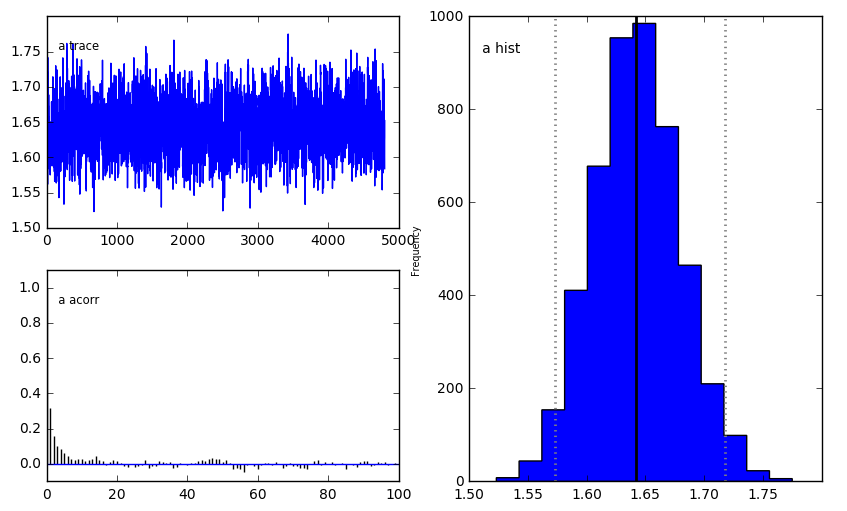

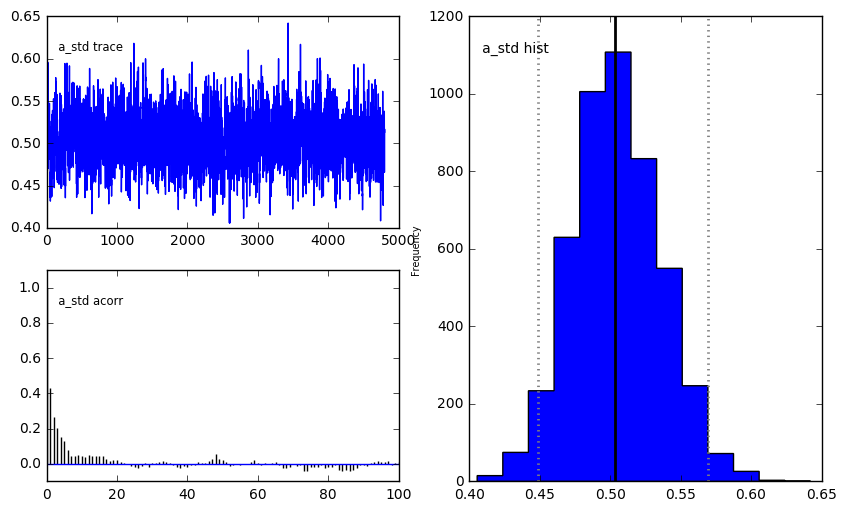

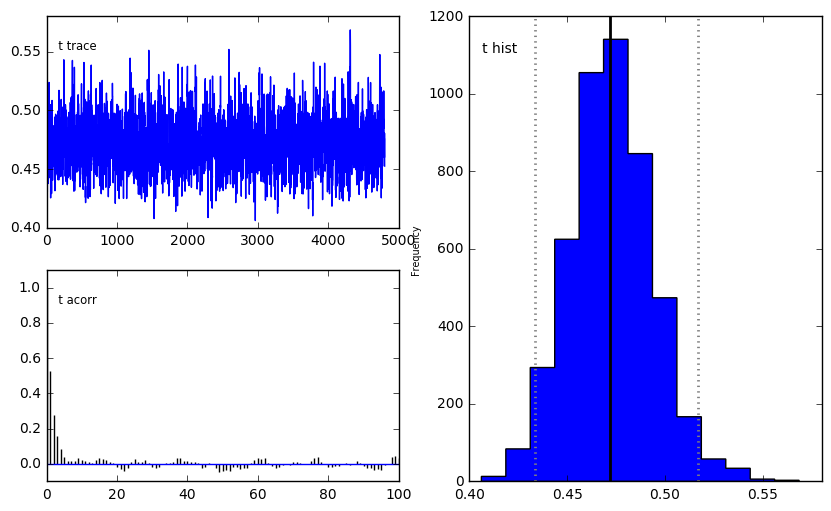

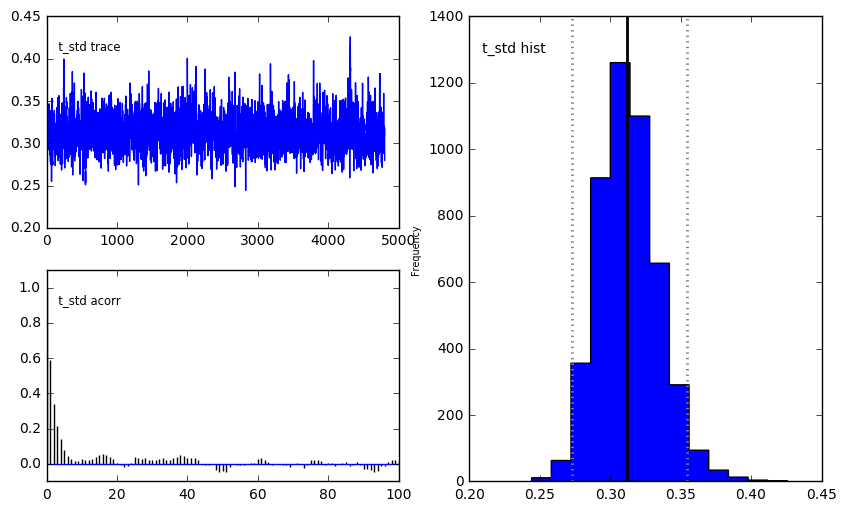

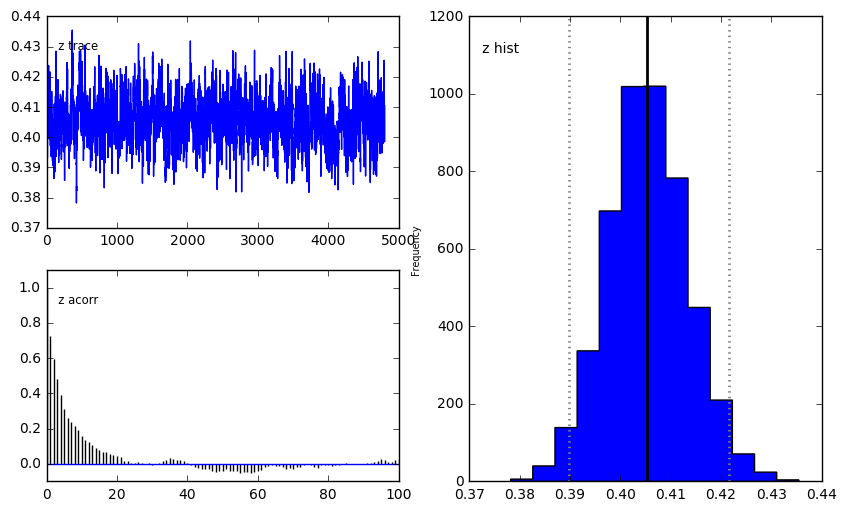

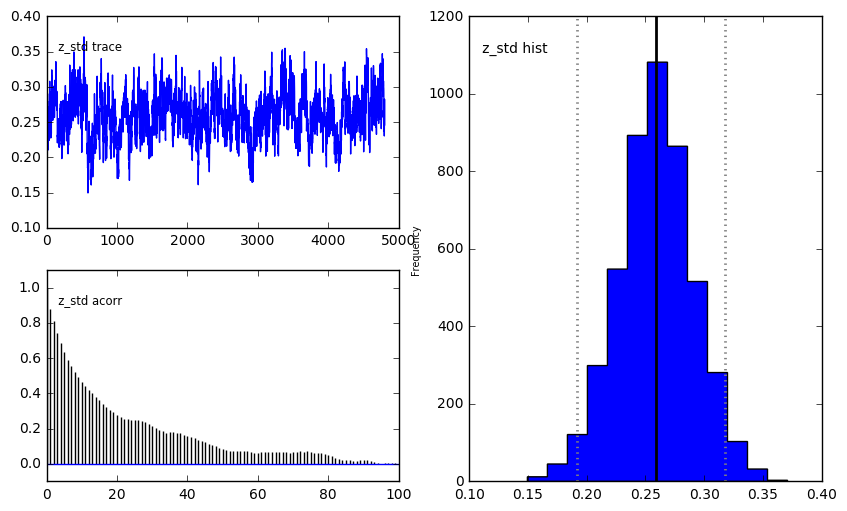

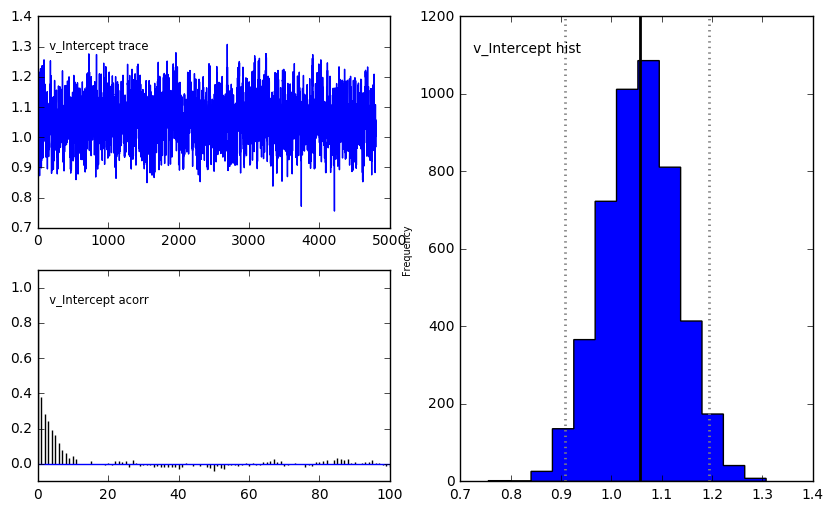

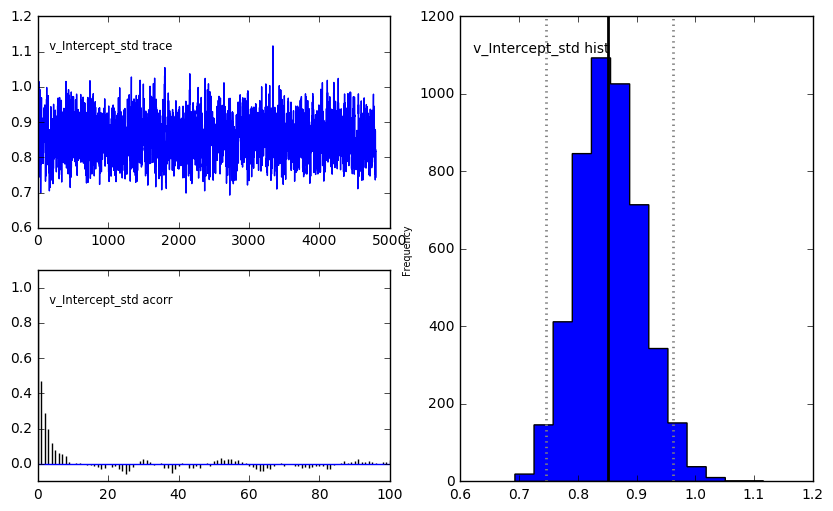

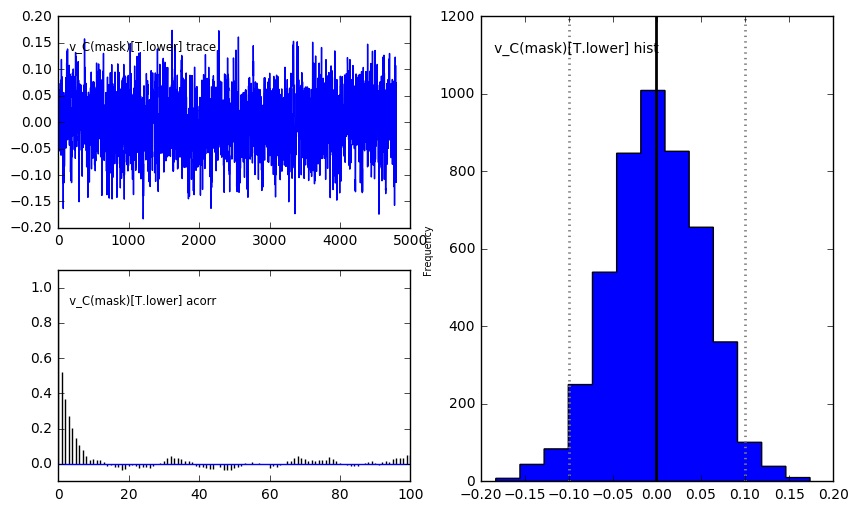

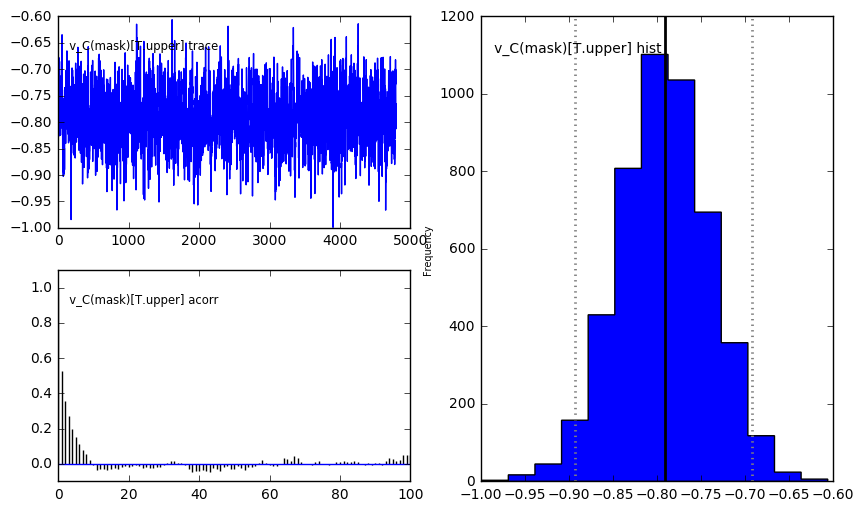

In [23]:
# run model
m_aa1.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_aa1.print_stats()
m_aa1.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                         mean        std       2.5q  \
a                                      1.6432  0.0372142    1.57252   
a_std                                0.506436  0.0312011   0.448145   
a_subj.02hcv424u29nd5w                2.24843   0.313884    1.72894   
a_subj.02k2uwlhgxnumn9                1.27137   0.166251   0.996876   
a_subj.03g7h2hzq4o3g26                2.92352   0.293064      2.408   
a_subj.0nmr75cysk1ae0e                1.81855    0.20687    1.45414   
a_subj.0t8qp67pqkw36cb                1.34263     0.1558    1.07258   
a_subj.0vfpn4uf3t031qu                1.07738   0.129244   0.854907   
a_subj.11dsfdtym1yy5mx                1.72477   0.183084    1.40595   
a_subj.1d3dadyu4ekqb4q                1.35062    0.17449    1.05634   
a_subj.1mt2emp4645cbl1                1.87067   0.216046    1.49385   
a_subj.1rst24mbtgy9rc8                1.78693   0.191868    1.45211   
a_subj.1sala6c9yc2bm1w                1.92772   0.376597    1.35059   
a_subj

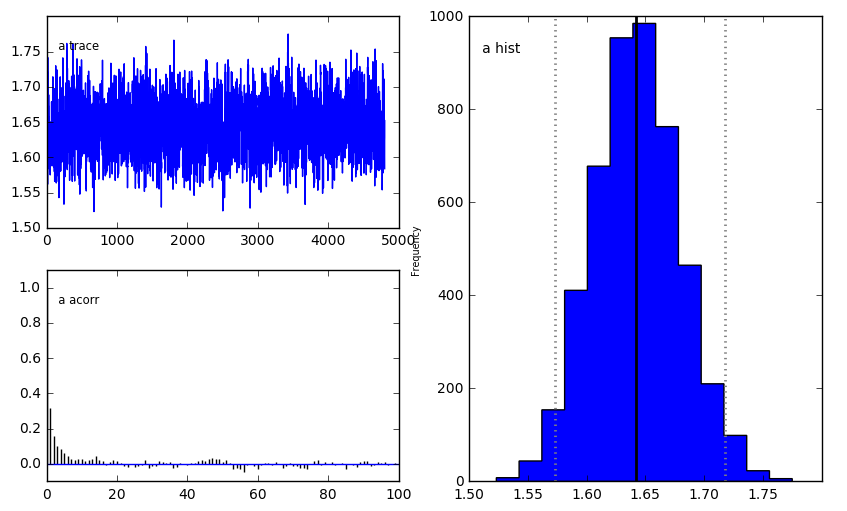

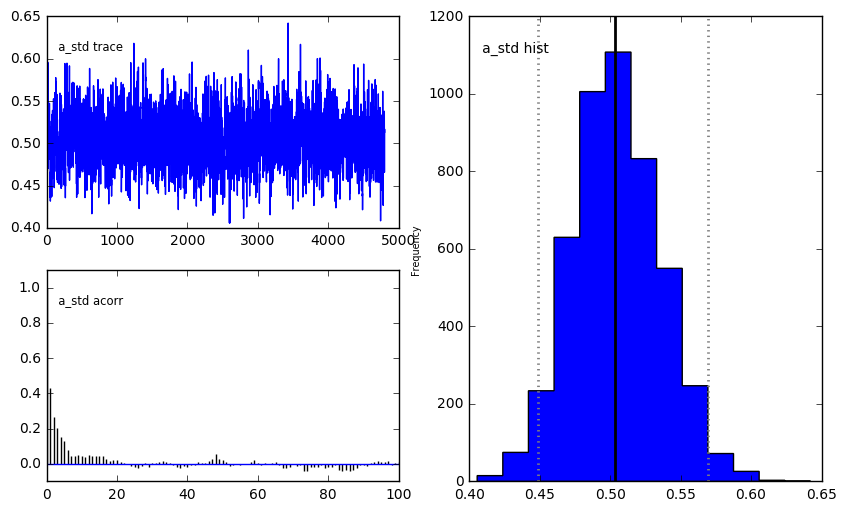

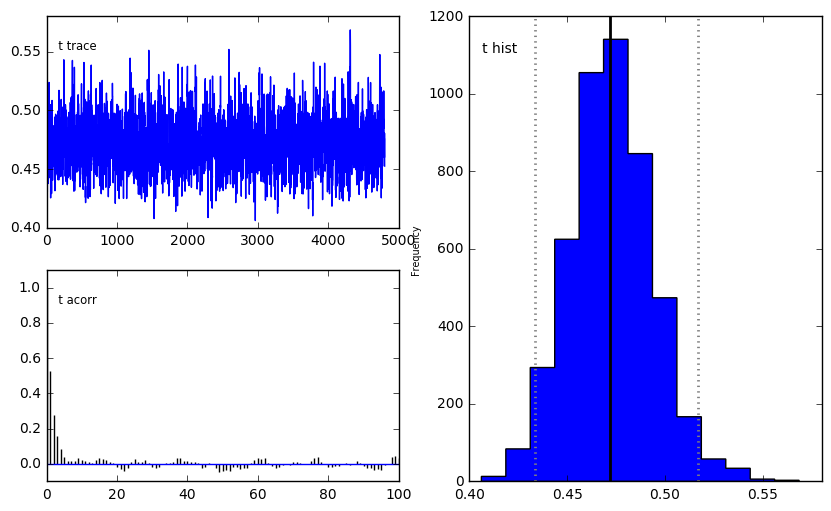

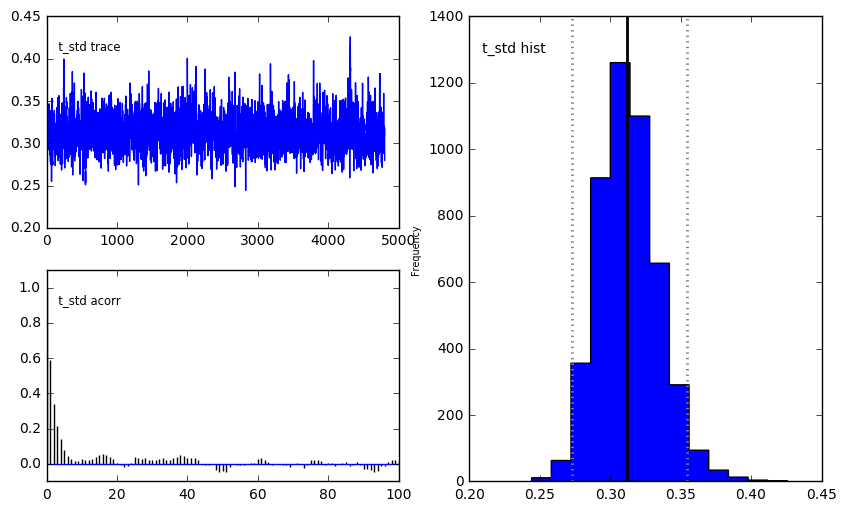

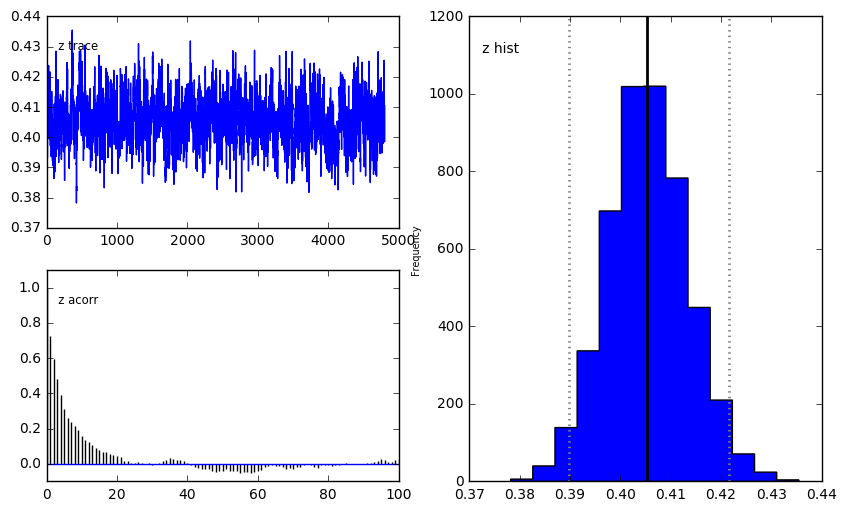

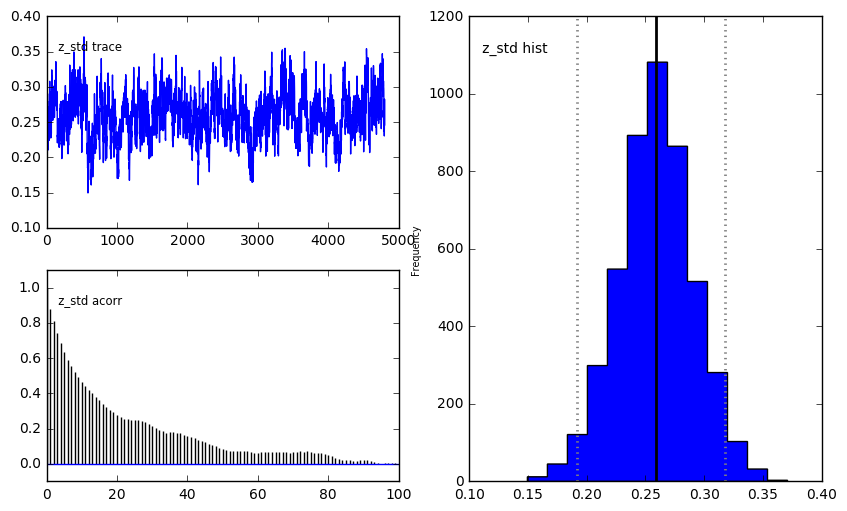

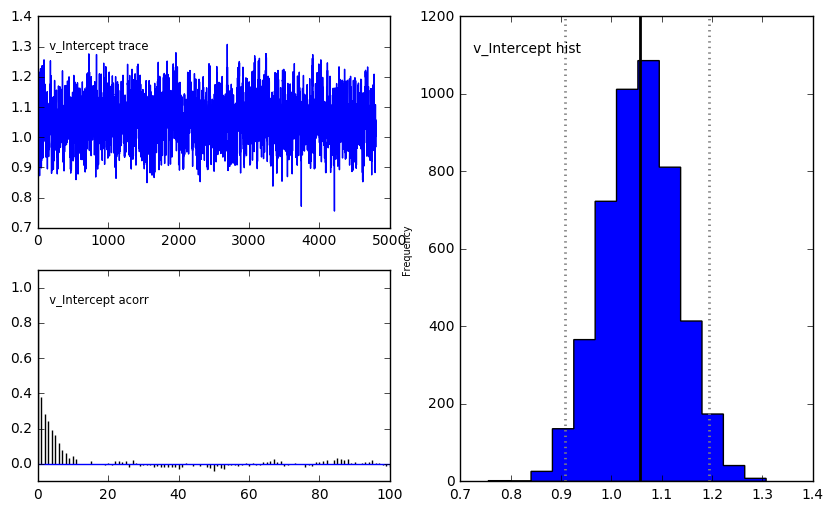

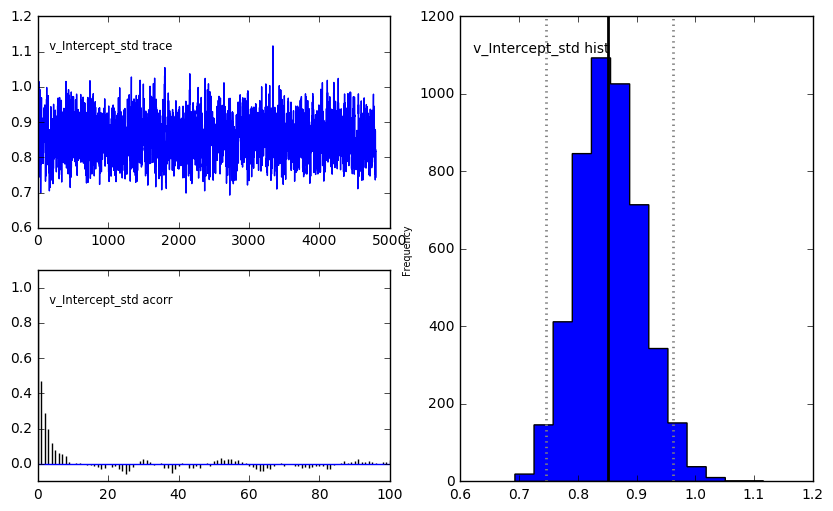

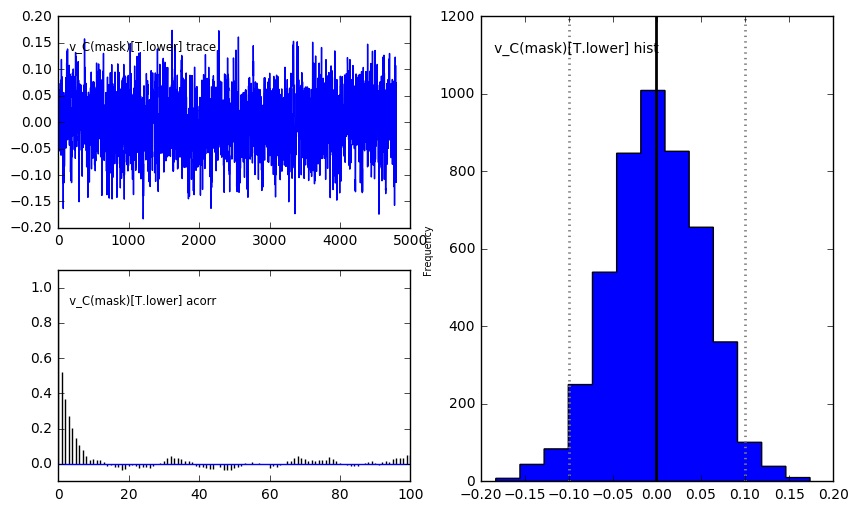

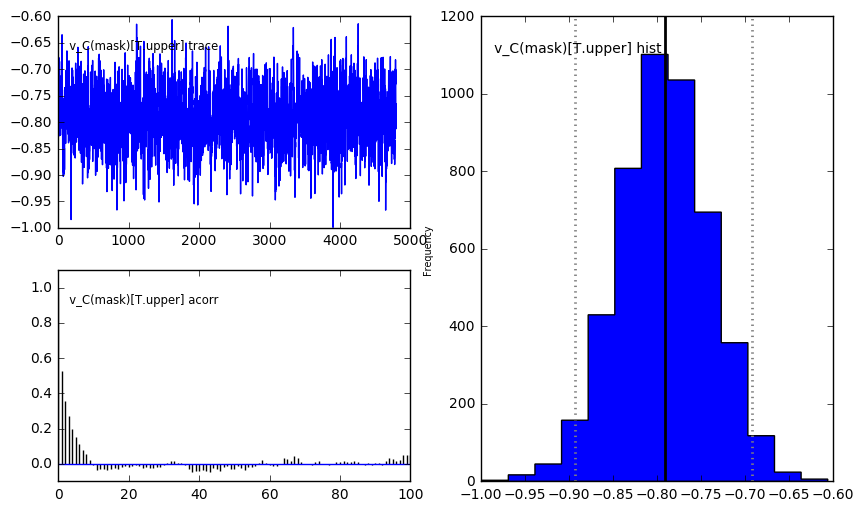

In [24]:
# save model stats
aa1_stats = m_aa1.gen_stats()
print(aa1_stats)
aa1_stats.to_csv('aa1_5000/faceMask_hddm_drift_maskFalseNegatives_aa1_5000.csv', index=True)

# save model posterior plots
m_aa1.plot_posteriors(path='aa1_5000/_posteriors', save=True)

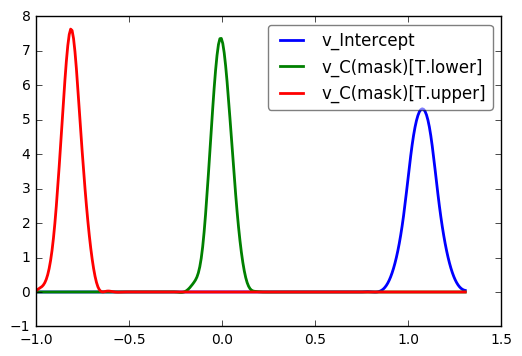

In [25]:
# plot model posteriors by mask
aa1_v_none, aa1_v_lower, aa1_v_upper = m_aa1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([aa1_v_none, aa1_v_lower, aa1_v_upper])
plt.savefig('aa1_5000/faceMask_hddm_drift_maskFalsePositives_aa1_5000_v_mask.pdf')

In [26]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(aa1_v_none > 0) = ", (aa1_v_none.trace() > 0).mean())
print("P(aa1_v_lower < 0) = ", (aa1_v_lower.trace() < 0).mean())
print("P(aa1_v_upper > 0) = ", (aa1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(aa1_v_lower < aa1_v_upper) = ", (aa1_v_lower.trace() < aa1_v_upper.trace()).mean())

P(aa1_v_none > 0) =  1.0
P(aa1_v_lower < 0) =  0.507083333333
P(aa1_v_upper > 0) =  0.0
P(aa1_v_lower < aa1_v_upper) =  0.0


In [12]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


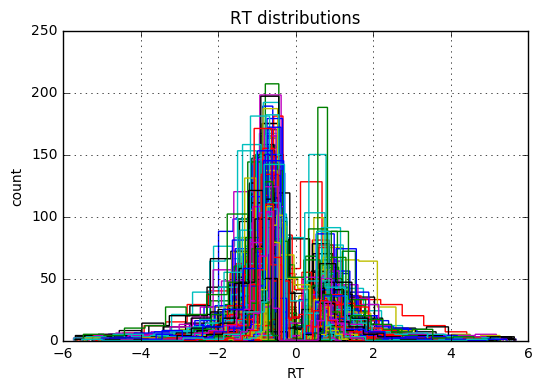

In [13]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [14]:
# subset dataset by emotion rating type (angry) and facial expression (angry)
aa2_data = data2.loc[(data2['emotionRating'] == 'angry') & (data2['expression'] == 'angry')]
aa2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
269,lbmmswtrr0mpvov,5,2,angry,270,_faces/BF10_A_X.jpg,BF10_A_X,BF10,B,F,angry,baseline,1,1.570545,100,0,0,0,0,0
271,lbmmswtrr0mpvov,5,2,angry,272,_faces/HF09_A_L.jpg,HF09_A_L,HF09,H,F,angry,lower,1,0.988070,50,0,0,0,0,0
283,lbmmswtrr0mpvov,5,2,angry,284,_faces/WM13_A_L.jpg,WM13_A_L,WM13,W,M,angry,lower,1,0.758390,50,0,0,0,0,0
285,lbmmswtrr0mpvov,5,2,angry,286,_faces/HF09_A_U.jpg,HF09_A_U,HF09,H,F,angry,upper,1,1.196710,50,0,0,0,0,0
286,lbmmswtrr0mpvov,5,2,angry,287,_faces/BF10_A_L.jpg,BF10_A_L,BF10,B,F,angry,lower,1,0.885205,50,0,0,0,0,0
288,lbmmswtrr0mpvov,5,2,angry,289,_faces/BF10_A_U.jpg,BF10_A_U,BF10,B,F,angry,upper,0,-1.356640,50,0,0,0,0,0
290,lbmmswtrr0mpvov,5,2,angry,291,_faces/WM13_A_X.jpg,WM13_A_X,WM13,W,M,angry,baseline,1,1.074130,100,0,0,0,0,0
291,lbmmswtrr0mpvov,5,2,angry,292,_faces/HF09_A_X.jpg,HF09_A_X,HF09,H,F,angry,baseline,1,0.907300,100,0,0,0,0,0
322,lbmmswtrr0mpvov,5,2,angry,323,_faces/WM13_A_U.jpg,WM13_A_U,WM13,W,M,angry,upper,0,-0.707780,50,0,0,0,0,0
433,mr81dhy9r5lxu8r,2,5,angry,111,_faces/BM17_A_L.jpg,BM17_A_L,BM17,B,M,angry,lower,0,-1.155000,50,0,0,0,0,0


In [15]:
# drop any subjects missing columns in design matrix (otherwise produces error)
aa2_data = aa2_data[(aa2_data.subj_idx != 'bmlp46ta94pzt5x') & (aa2_data.subj_idx != 'dqph4ch0mkofejw') & (aa2_data.subj_idx != 'me8doxrmo9vj9dx')]

In [16]:
# define model
m_aa2 = hddm.HDDMRegressor(aa2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 41078.6 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q        50q        75q      97.5q       mc err
a                                   1.56272  0.0342647    1.49702    1.53917    1.56153    1.58604    1.63261   0.00116695
a_std                              0.403575  0.0320255   0.344686    0.38233    0.40251   0.423865   0.470489   0.00122911
a_subj.09coqg8hlpux6fe              1.50704   0.217493     1.1337    1.35157    1.49453     1.6432    1.97341   0.00418639
a_subj.0b3t2skj9mlhbkn              1.43746   0.255594    1.01413    1.25641    1.41046    1.58819    2.01686   0.00609534
a_subj.0bcg7mtj2n1jjw9              2.63196   0.369368     2.0093    2.36254    2.60295    2.86308    3.44194   0.00838057
a_subj.0s53r30oouek89b              2.08493    0.37006    1.45089    1.81551    2.05053    2.32484    2.89094   0.00865032
a_subj.0uj9gbhag3o1w1v              1.93991   0.349117    1.35598    1.68806     1.9096    2.15633    2.71036   0.00862081
a_subj.17nzn4k8r

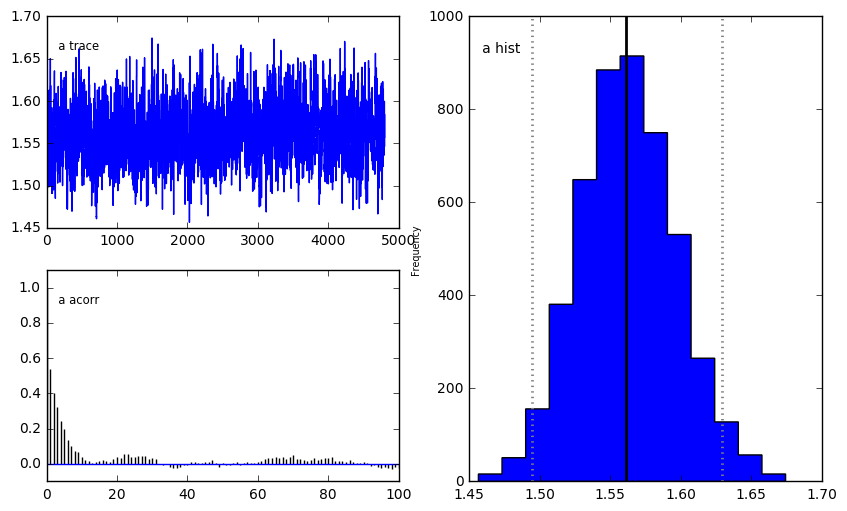

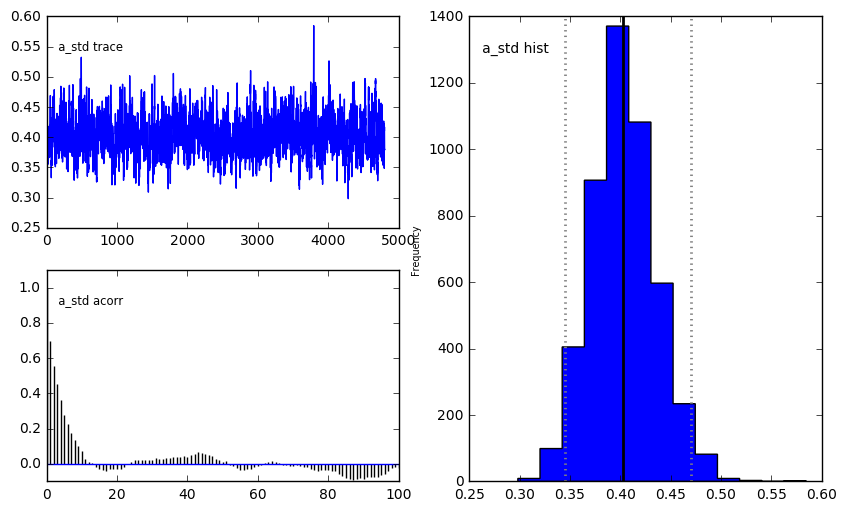

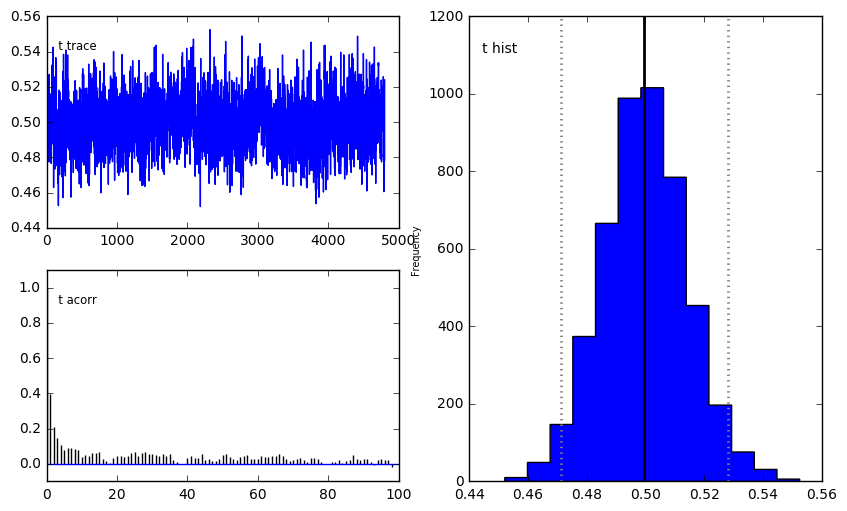

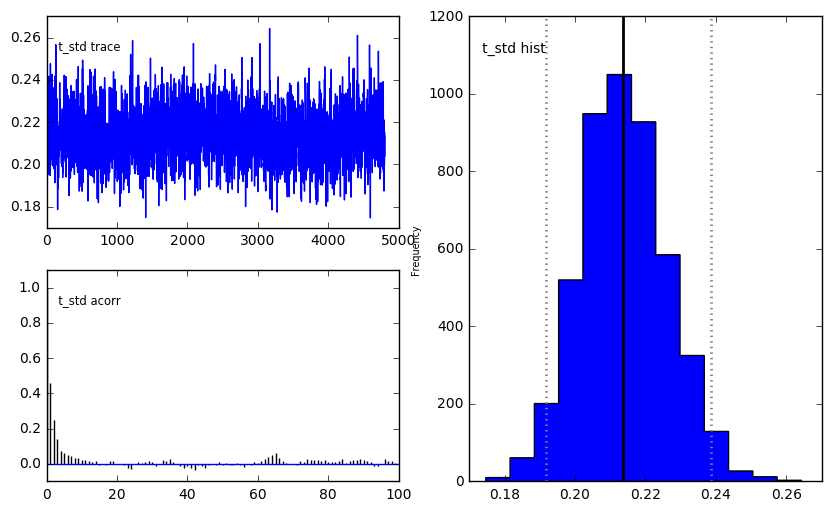

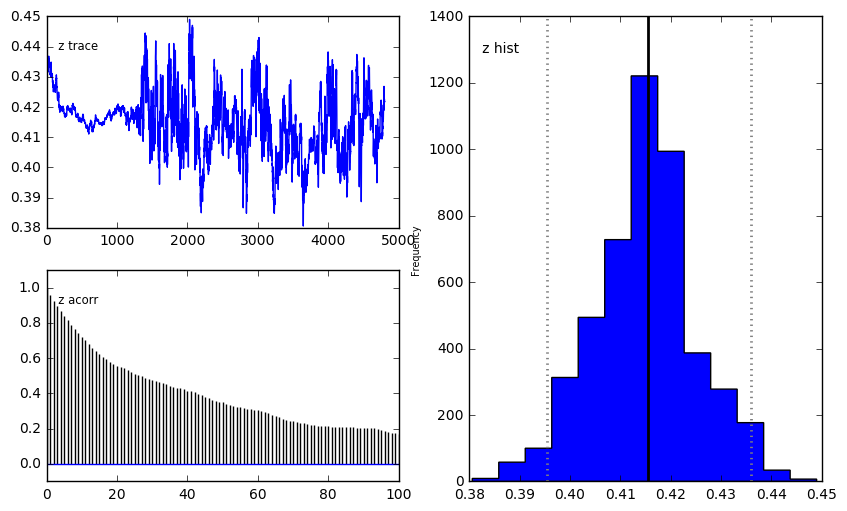

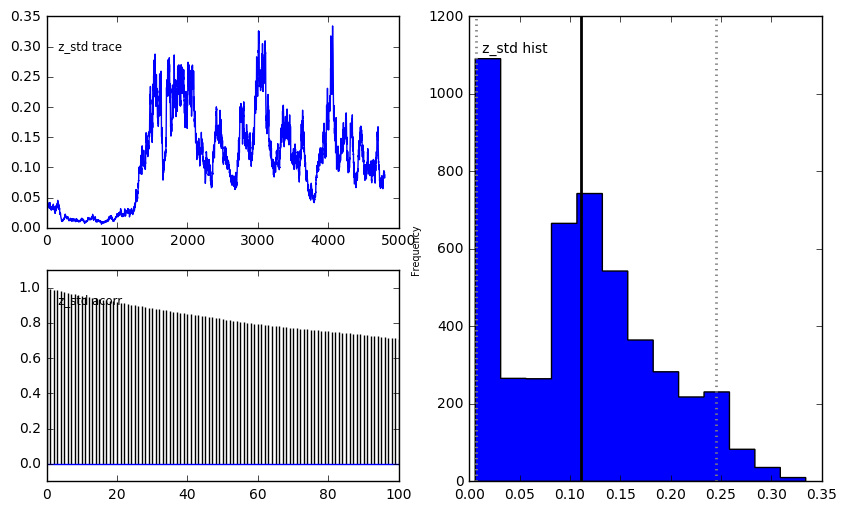

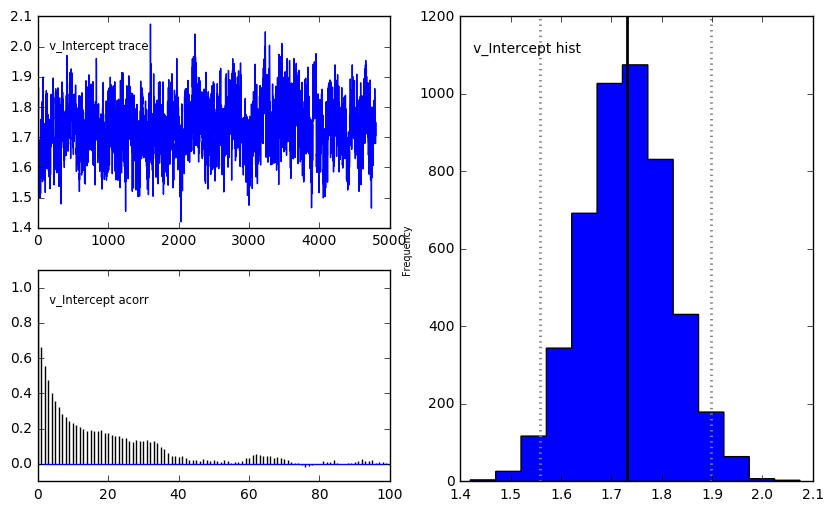

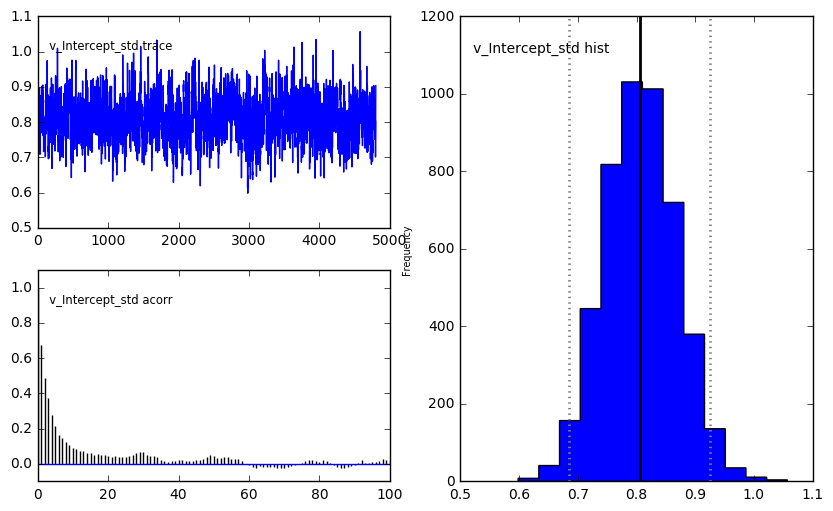

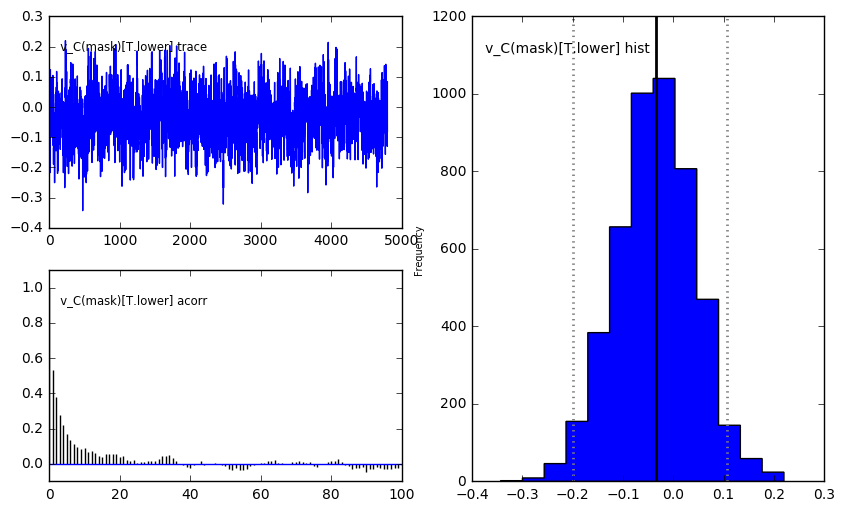

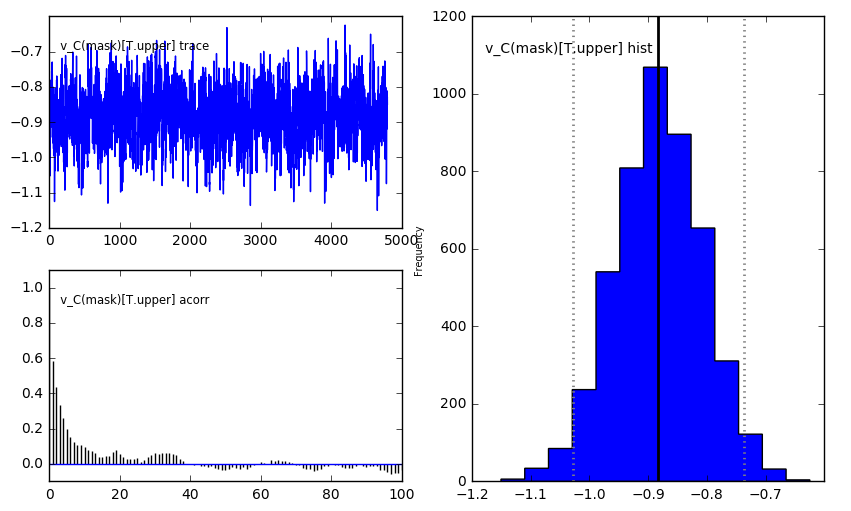

In [17]:
# run model
m_aa2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_aa2.print_stats()
m_aa2.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.56272  0.0342647    1.49702    1.53917   
a_std                              0.403575  0.0320255   0.344686    0.38233   
a_subj.09coqg8hlpux6fe              1.50704   0.217493     1.1337    1.35157   
a_subj.0b3t2skj9mlhbkn              1.43746   0.255594    1.01413    1.25641   
a_subj.0bcg7mtj2n1jjw9              2.63196   0.369368     2.0093    2.36254   
a_subj.0s53r30oouek89b              2.08493    0.37006    1.45089    1.81551   
a_subj.0uj9gbhag3o1w1v              1.93991   0.349117    1.35598    1.68806   
a_subj.17nzn4k8r1qkmrn               1.5457   0.242048    1.13483    1.37425   
a_subj.1fdkw2qjx3hc3lk              1.40677   0.208628    1.05644    1.25904   
a_subj.1mla0dmotqefnav              1.42081   0.258616    1.00258    1.23814   
a_subj.23hr9tl84h3zhw3              1.56161    0.29895    1.07796    1.34673   
a_subj.27muqwvalwne26r              1.77

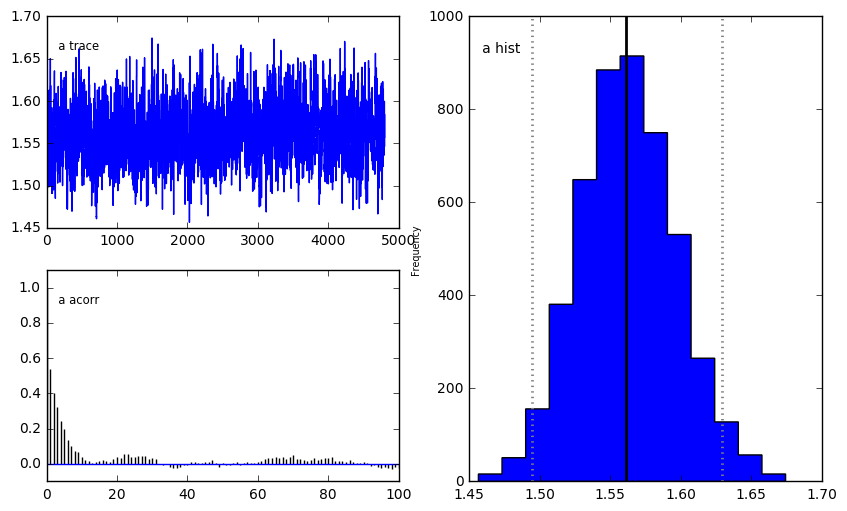

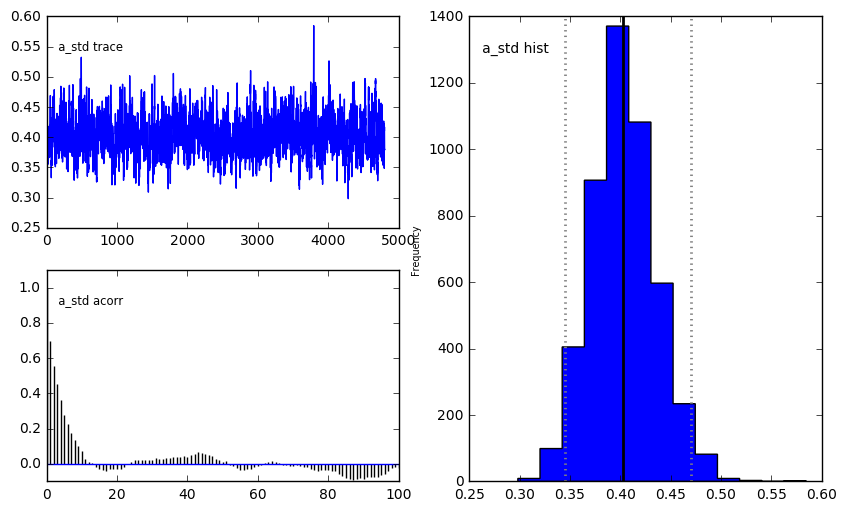

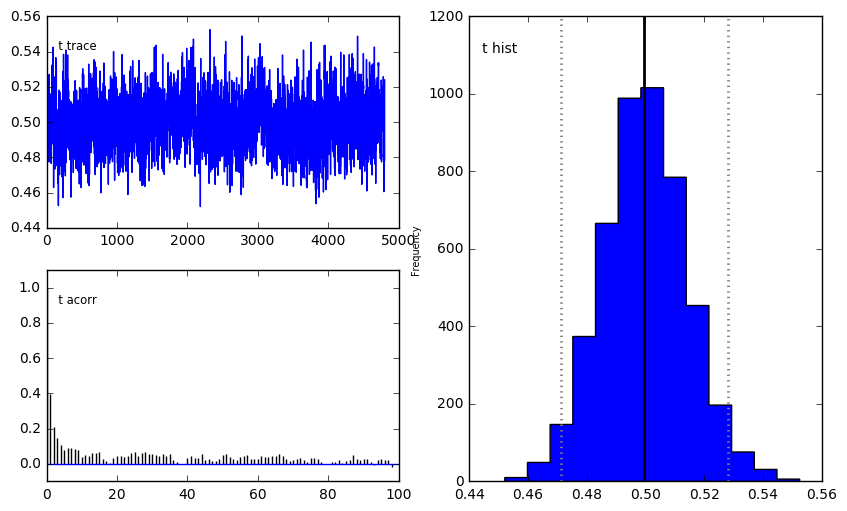

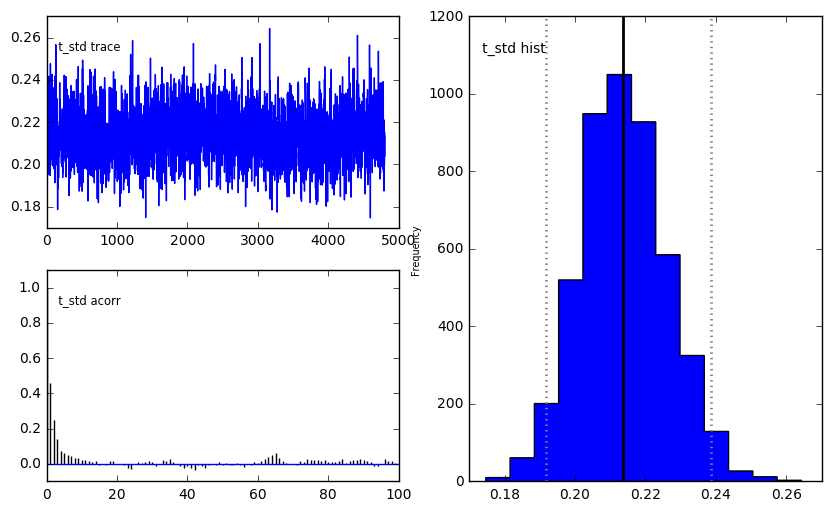

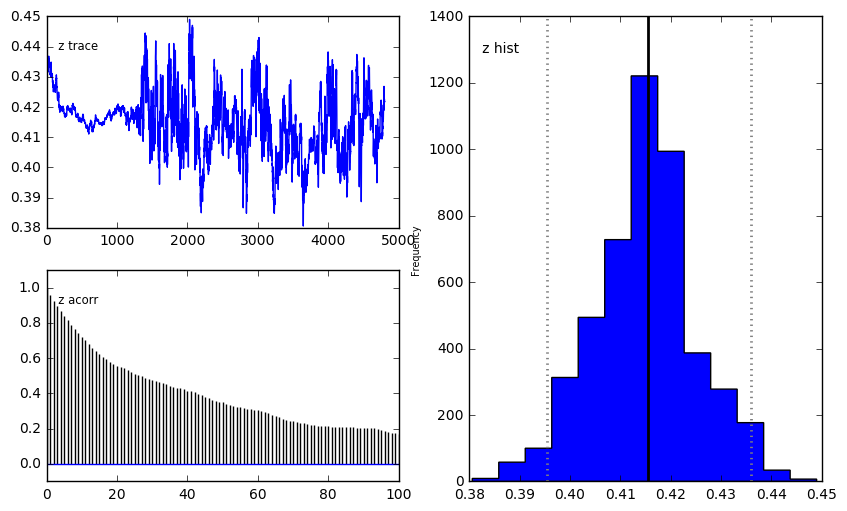

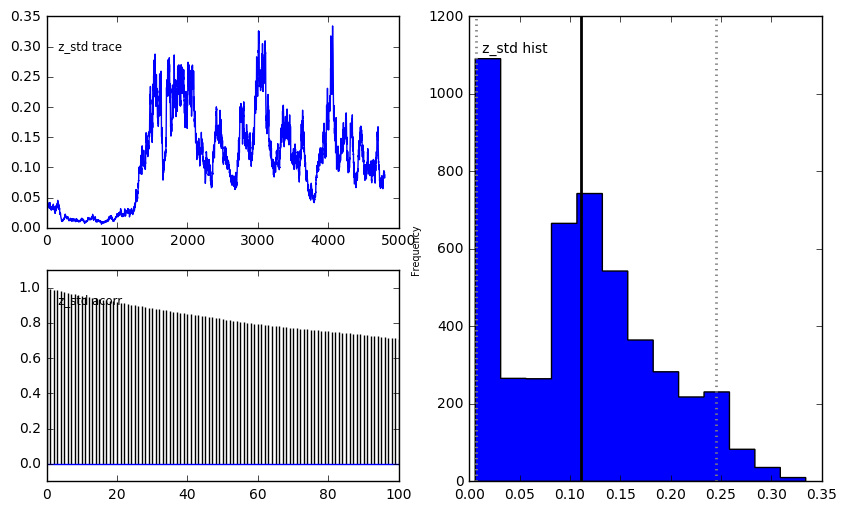

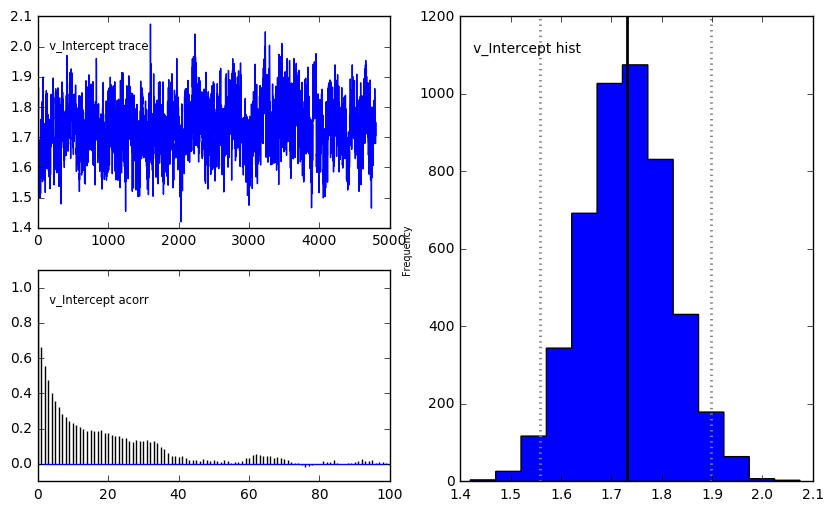

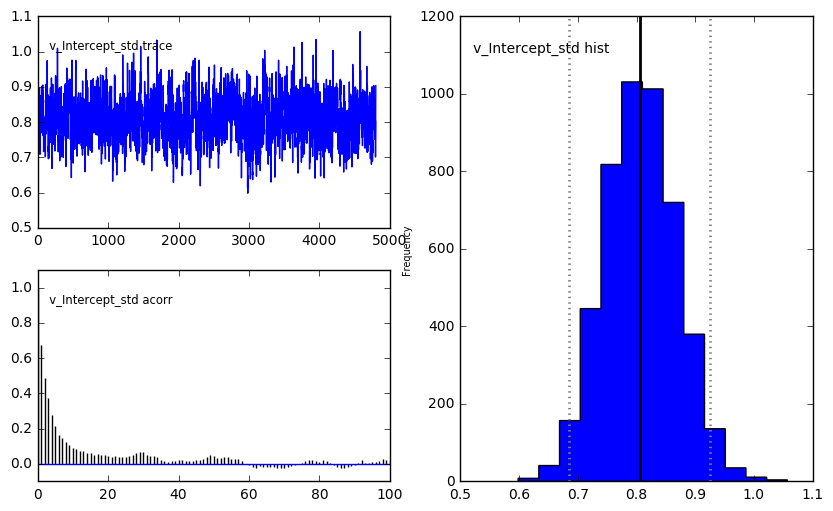

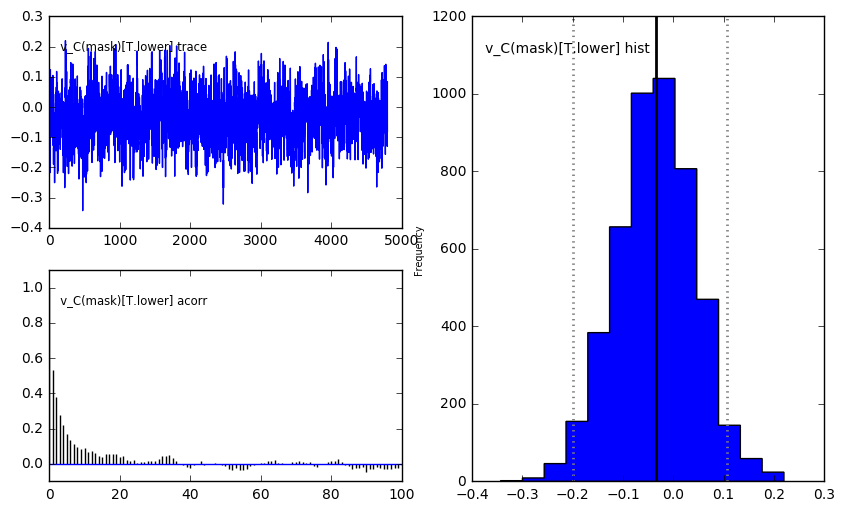

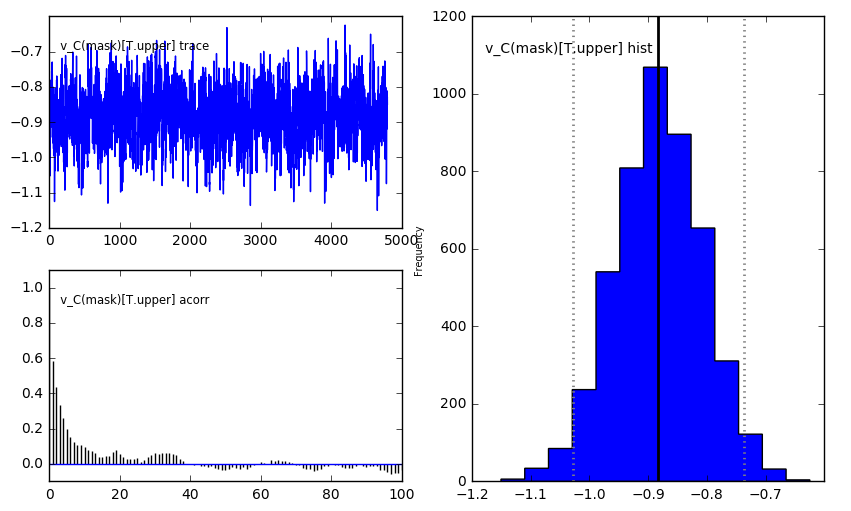

In [18]:
# save model stats
aa2_stats = m_aa2.gen_stats()
print(aa2_stats)
aa2_stats.to_csv('aa2_5000/faceMask2_hddm_drift_maskFalseNegatives_aa2_5000.csv', index=True)

# save model posterior plots
m_aa2.plot_posteriors(path='aa2_5000/_posteriors', save=True)

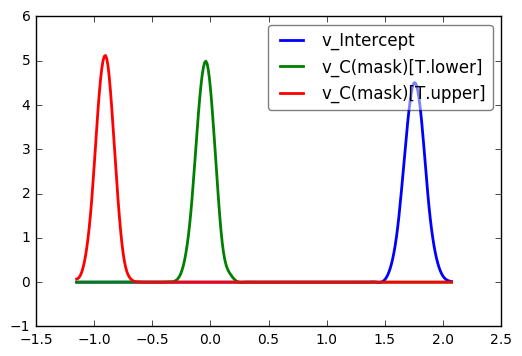

In [19]:
# plot model posteriors by mask
aa2_v_none, aa2_v_lower, aa2_v_upper = m_aa2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([aa2_v_none, aa2_v_lower, aa2_v_upper])
plt.savefig('aa2_5000/faceMask2_hddm_drift_maskFalsePositives_aa2_5000_v_mask.pdf')

In [40]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(aa2_v_none < 0) = ", (aa2_v_none.trace() < 0).mean())
print("P(aa2_v_lower > 0) = ", (aa2_v_lower.trace() > 0).mean())
print("P(aa2_v_upper > 0) = ", (aa2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(aa2_v_lower < aa2_v_upper) = ", (aa2_v_lower.trace() < aa2_v_upper.trace()).mean())

P(aa2_v_none < 0) =  0.0
P(aa2_v_lower > 0) =  0.331041666667
P(aa2_v_upper > 0) =  0.0
P(aa2_v_lower < aa2_v_upper) =  0.0


In [41]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(aa1_v_none > aa2_v_none) = ", ((aa1_v_none.trace() > aa2_v_none.trace()).mean()))
print("P(aa1_v_lower < aa2_v_lower) = ", ((aa1_v_lower.trace() < aa2_v_lower.trace()).mean()))
print("P(aa1_v_upper < aa2_v_upper) = ", ((aa1_v_upper.trace() < aa2_v_upper.trace()).mean()))


P(aa1_v_none > aa2_v_none) =  0.0
P(aa1_v_lower < aa2_v_lower) =  0.357083333333
P(aa1_v_upper < aa2_v_upper) =  0.159583333333


In [37]:
## adding together the relative values:
aa1_v_none_plus_lower = aa1_v_none.trace() + aa1_v_lower.trace()
aa1_v_none_plus_upper = aa1_v_none.trace() + aa1_v_upper.trace()
aa2_v_none_plus_lower = aa2_v_none.trace() + aa2_v_lower.trace()
aa2_v_none_plus_upper = aa2_v_none.trace() + aa2_v_upper.trace()

In [39]:
print("P(aa1_v_none_plus_lower > aa2_v_none_plus_lower) = ", (aa1_v_none_plus_lower > aa2_v_none_plus_lower).mean())
print("P(aa1_v_none_plus_upper > aa2_v_none_plus_upper) = ", (aa1_v_none_plus_upper > aa2_v_none_plus_upper).mean())

P(aa1_v_none_plus_lower > aa2_v_none_plus_lower) =  0.0
P(aa1_v_none_plus_upper > aa2_v_none_plus_upper) =  0.0
